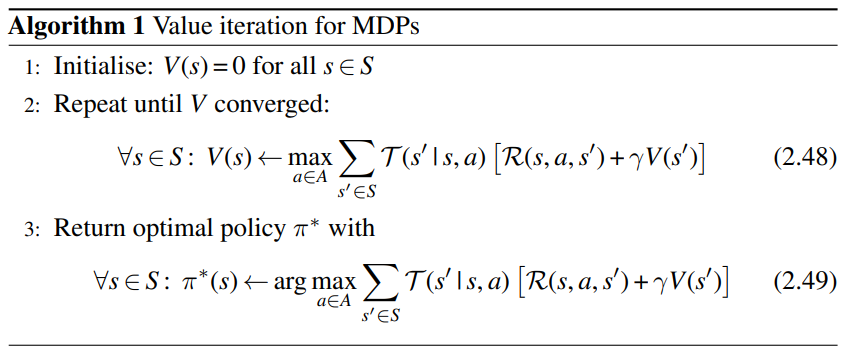

In [1]:
from IPython.display import JSON
import numpy as np

from environment.mars_rover import MarsRover

In [2]:
def value_iteration(env, gamma=0.95):
    state_space_size = env.observation_space.n
    V = np.zeros(state_space_size)
    convergence_threshold = 1e-10
    convergence = False
    while not convergence:
        T = env.get_transition_matrix()
        R = env.get_rewards_matrix()
        new_V = (
            (T * (R + gamma * V[np.newaxis, np.newaxis, :]))
            .sum(axis=2)
            .max(axis=1)
        )
        convergence = np.abs(new_V - V).max() < convergence_threshold
        V = new_V
    return V


env = MarsRover()
values = value_iteration(env)
JSON(
    {
        env.STATES[idx]: round(value, 1)
        for idx, value in enumerate(values)
        if not env.is_terminal(idx)
    }
)

<IPython.core.display.JSON object>

In [4]:
def get_optimal_policy(env: MarsRover, V: np.ndarray, gamma=0.95):
    T = env.get_transition_matrix()
    R = env.get_rewards_matrix()
    policy = (
        (T * (R + gamma * V[np.newaxis, np.newaxis, :]))
        .sum(axis=2)
        .argmax(axis=1)
    )
    return policy

policy = get_optimal_policy(env, values)
JSON(
    {
        env.STATES[idx]: env.ACTIONS[value]
        for idx, value in enumerate(policy)
        if not env.is_terminal(idx)
    }
)

<IPython.core.display.JSON object>